# Sales Forecasting & Trend Analysis

## 1. Introduction
## 2. Load and Clean the Dataset
## 3. Feature Engineering (Dates, Month, Year, etc.)
## 4. Trend Analysis
   - Sales Over Time
   - Rolling Average (7-day / 30-day)
   - Seasonality Patterns
## 5. Segment Breakdown
   - Sales by Category / Region
   - Month-on-Month / Year-on-Year
## 6. Insights & Business Recommendations
## 7. Conclusion


### Introduction

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("SuperstoreSales.csv", encoding='ISO-8859-1')


# Check if it's loaded correctly
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Date Cleaning & Feature Engineering

#### Converting Order Date to datetime

In [2]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #This ensures we can group and filter by date parts (month, year, etc.)

#### Creating New Time Columns

In [3]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')
df['Quarter'] = df['Order Date'].dt.quarter
df['Week'] = df['Order Date'].dt.isocalendar().week #These help us analyze trends across months, years, and seasons.

#### Previewing the Columns

In [4]:
df[['Order Date', 'Year', 'Month', 'Month_Name', 'Quarter', 'Week']].head()

,Order Date,Year,Month,Month_Name,Quarter,Week
0,2016-11-08,2016,11,Nov,4,45
1,2016-11-08,2016,11,Nov,4,45
2,2016-06-12,2016,6,Jun,2,23
3,2015-10-11,2015,10,Oct,4,41
4,2015-10-11,2015,10,Oct,4,41


#### Trend Analysis

✅ 1. Monthly Sales Trend (All Time)

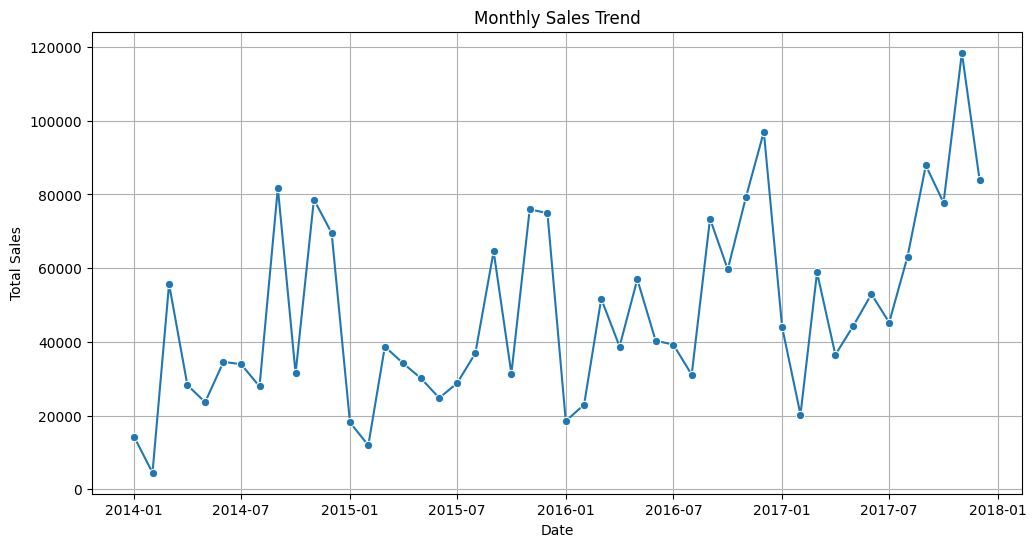

In [5]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a new datetime column for plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()

✅ 2. Rolling Average (3-month smoother)

In [6]:
#This helps reduce noise and highlight patterns.

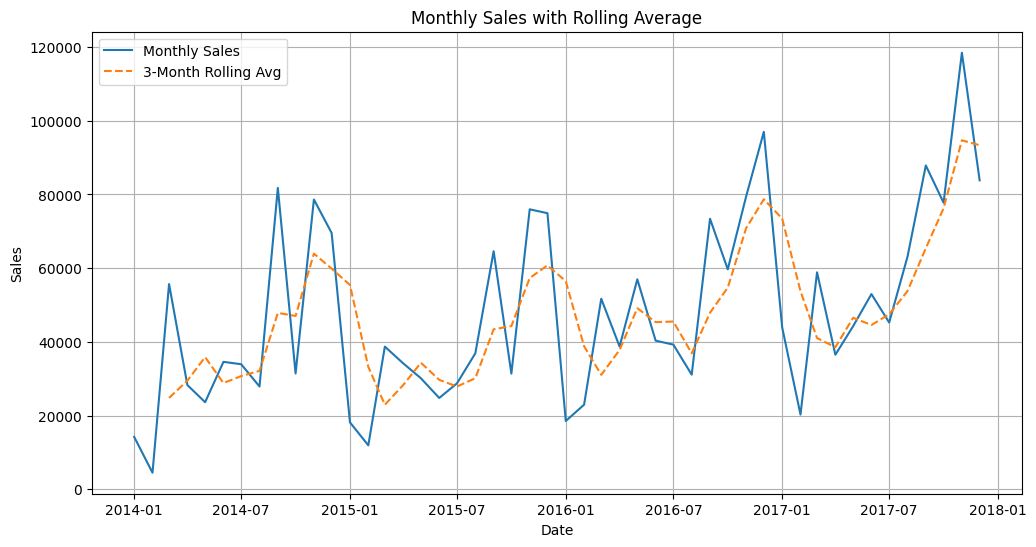

In [7]:
monthly_sales['Rolling_3mo'] = monthly_sales['Sales'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=monthly_sales, label='Monthly Sales')
sns.lineplot(x='Date', y='Rolling_3mo', data=monthly_sales, label='3-Month Rolling Avg', linestyle='--')
plt.title('Monthly Sales with Rolling Average')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

✅ 3. Monthly Sales Heatmap by Year

In [9]:
#This shows seasonality visually. Powerful for management teams.

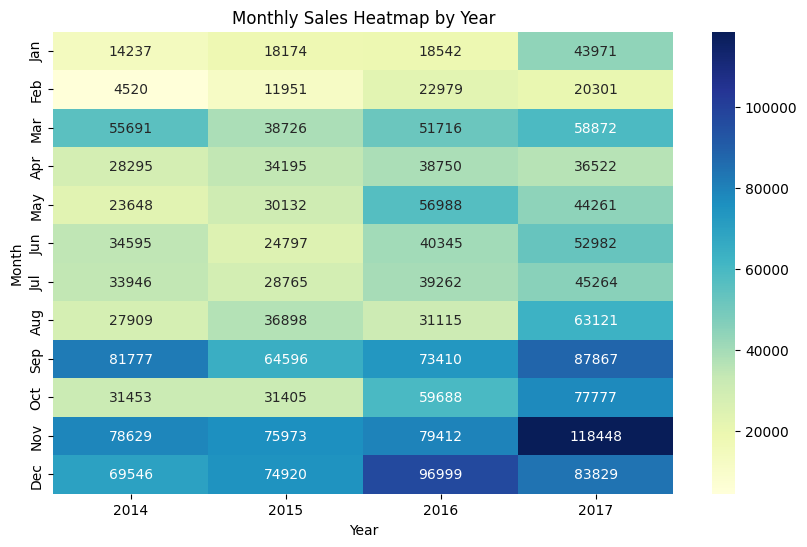

In [10]:
pivot_table = df.pivot_table(index='Month_Name', columns='Year', values='Sales', aggfunc='sum')

# Ensure months are ordered
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table.reindex(ordered_months)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Sales Heatmap by Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

#### Segment Breakdown

✅ 1. Total Sales by Region

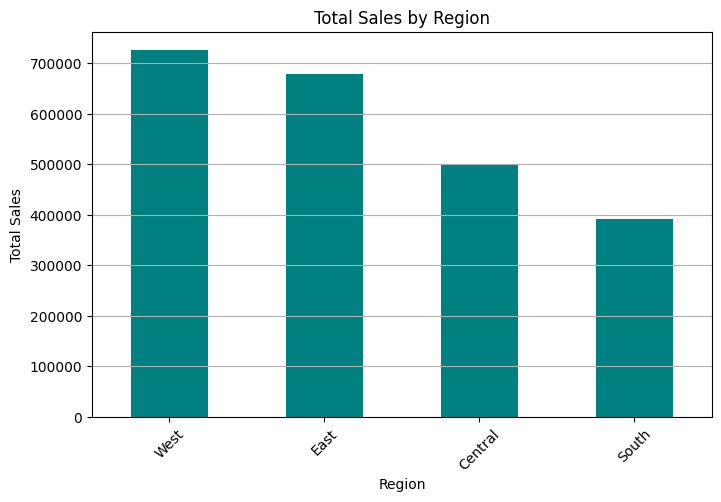

In [11]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

✅ 2. Sales by Region and Category

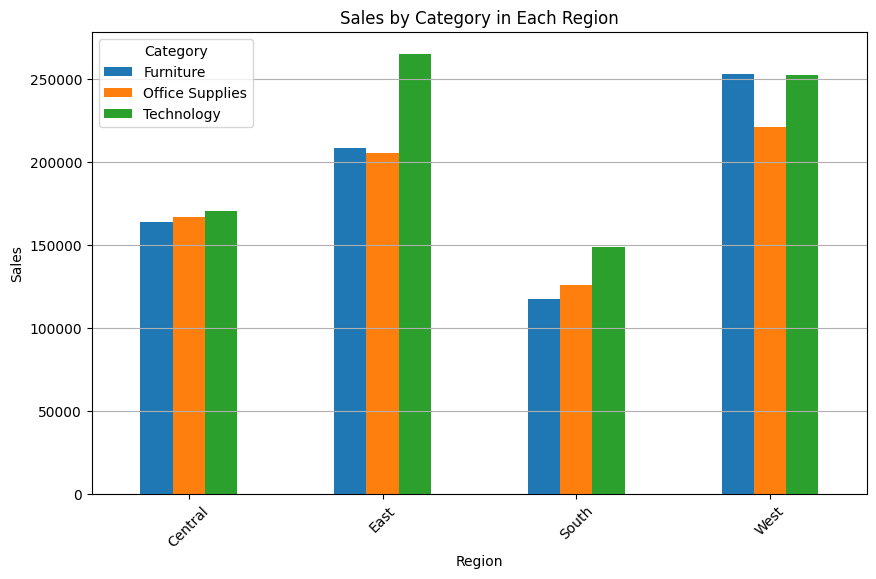

In [12]:
pivot = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')

pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Category in Each Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Category')
plt.show()

✅ 3. Profit Distribution by Category

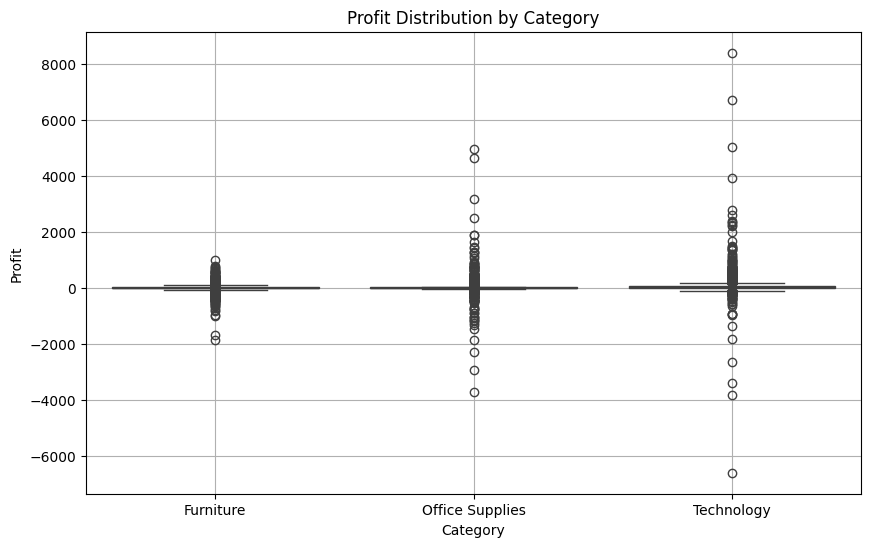

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='Profit')
plt.title('Profit Distribution by Category')
plt.grid(True)
plt.show()


In [14]:
#Insight: Some categories may have high sales but low or volatile profit.

✅ 4. Heatmap: Sub-Category vs Region

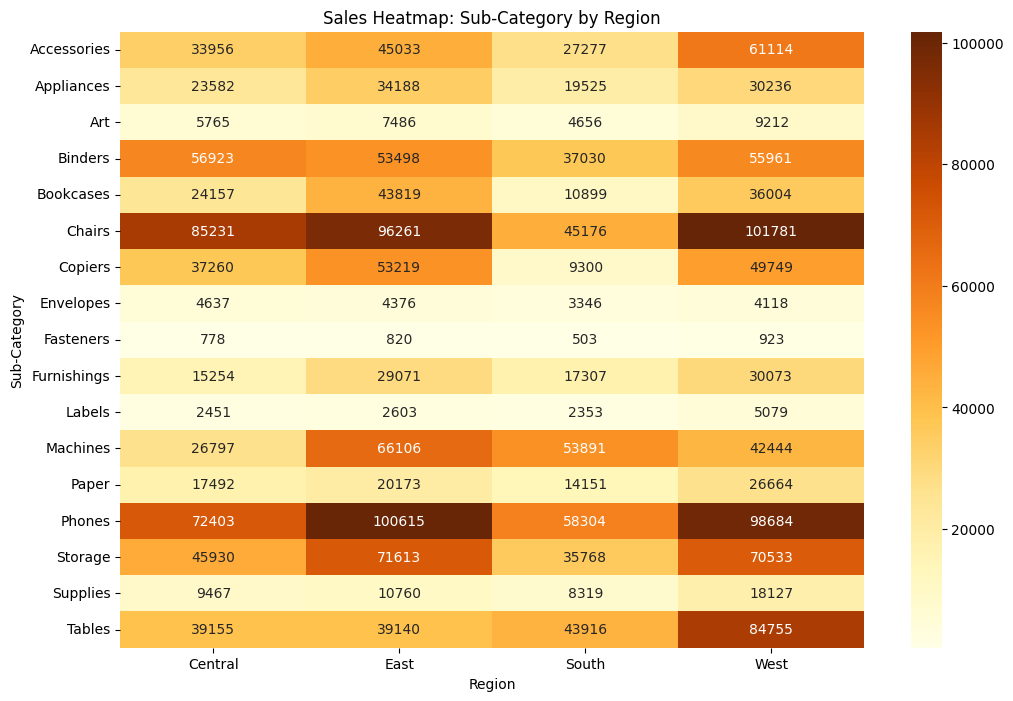

In [15]:
heatmap_data = df.pivot_table(index='Sub-Category', columns='Region', values='Sales', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrBr')
plt.title('Sales Heatmap: Sub-Category by Region')
plt.show()

##  Insights & Business Recommendations

✅ Insights

1. Sales Peaks in Q4, Especially December
There’s a strong increase in sales towards the end of each year, with December consistently being the top-performing month.

2. Steady Growth Trend with Short-Term Fluctuations
Despite monthly ups and downs, the 3-month rolling average reveals a gradual upward sales trend across years.

3. West and East Regions Lead in Revenue
The West region has the highest total sales, followed by the East. These regions are key growth drivers.

4. Technology Category Dominates Sales
Among all categories, Technology contributes the most revenue, especially in the West and East.

5. Furniture Shows Lower Profit Margins
The Furniture category exhibits high profit variability and lower median profits, indicating margin issues.

6. Office Supplies Are Consistent Performers
The Office Supplies category performs steadily across all regions, especially in the Central region.

7. Sub-Category Strengths Are Region-Specific
Sub-categories like Phones, Chairs, and Binders perform well in some regions more than others. Important for inventory strategy.

✅ Business Recommendations


- Focus marketing and promotions in Q4, especially during November and December.

- Consider expanding operations in the West and East regions. They generate the highest returns.

- Bundle or upsell Technology products in high-performing regions to boost AOV (average order value).

- Investigate Furniture pricing and logistics to improve its overall profitability.

- Consider regional stock optimization based on sub-category heatmap (e.g., more chairs in West, more binders in Central).

- Run cost control efforts for Furniture while maintaining quality to boost net profits.

####  Conclusion


The Superstore sales data reveals clear seasonal trends and regional performance patterns that can help drive smarter business decisions. Sales consistently peak in Q4, especially December, making it a critical time for promotions and inventory planning. The West and East regions lead in total revenue, while Technology is the strongest-performing category.

However, profit variability in categories like Furniture signals the need for margin optimization. By aligning sales strategy with regional and category-specific strengths, the company can enhance profitability and customer satisfaction.

This project showcases the value of time-based sales analysis for identifying actionable business opportunities.
